# PLANEJAMENTO

## A Empresa Insurance All

Disclaimer: O Contexto a seguir, é completamente fictício, a empresa, o contexto, o CEO, as perguntas de negócio existem somente na minha imaginação. 

A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

## O Desafio

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

1. Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
2. Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
3. E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
4. Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

## Dicionário de Dados

Id: identificador único do cliente.

Gender: gênero do cliente.

Age: idade do cliente.

Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )

Region Code: código da região do cliente.

Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

Vehicle Age: idade do veículo.

Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

Policy sales channel: código anônimo para o canal de contato com o cliente.

Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.


## Estudo sobre o Modelo de Negócio

Um modelo de negócio descreve a lógica de criação, entrega e captura valor por parte de uma organização.

Empresa Seguradora:

    Como aumentar o faturamento? 
        Aumentar o número de vendas
        Aumentar o valor do ticket
        Aumentar a frequência de compra do cliente ( comprar mais produtos )
        
    Custos:
        Custo da operação (funcionários, ferramentas)
        Custo de produção de produto
        Custo de aquisição de cliente (CAC)
        
    Aumentar número de vendas
        Up-Sell:
            incentivar o cliente a adquirir a versão mais sofisticada do produto (iphone 11 -> 12)
            
        Cross-Sell:
            Vender produtos ou serviços relacionados/complementares -> vender um smartphone e uma case
            
            
     A estratégia de Cross-Sell
         Quais clientes deveriam receber a oferta de Cross-Sell -> Calculo da probabilidade de compra
         Priorizar clientes que tem maior probabilidade de compra
         
Planejamento da Solução

Full dataset - 381K
    Training Data - 305K
    Validation Data - 76K
    
Calcular a probabilidade de compra

Teste Data - 127K

Calcular a probabilidade de compra
            
    
            
            

# IMPORTS

In [1]:
import inflection

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display  import HTML

from sklearn import preprocessing as pp

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# LOADING DATA

In [3]:
df_raw = pd.read_csv('datasets/train.csv')

# DATA DESCRIPTION

## Head

In [4]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


## Dimensions 

In [5]:
df_raw.shape

(381109, 12)

## Rename Columns

In [6]:
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 
            'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore( x )

cols_new = list(map(snakecase, cols_old))
df_raw.columns = cols_new

## Columns 

In [7]:
df_raw.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## Dtypes

In [8]:
df_raw.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## Check NA

In [9]:
df_raw.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## Estatística Descritiva

### Numerical Attributes

In [10]:
num_attributes = df_raw.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'region_code', 'policy_sales_channel'])

#Central Tendecy - Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.00,85.00,65.00,38.82,36.00,15.51,0.67,-0.57
1,driving_license,0.00,1.00,1.00,1.00,1.00,0.05,-21.60,464.35
2,previously_insured,0.00,1.00,1.00,0.46,0.00,0.50,0.17,-1.97
3,annual_premium,2630.00,540165.00,537535.00,30564.39,31669.00,17213.13,1.77,34.00
4,vintage,10.00,299.00,289.00,154.35,154.00,83.67,0.00,-1.20
5,response,0.00,1.00,1.00,0.12,0.00,0.33,2.30,3.30


Age: idade do cliente.

Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )

Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

Vehicle Age: idade do veículo.

Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.


# FEATURE ENGINEERING

In [11]:
df2 = df_raw.copy()

## Vehicle_age

In [12]:
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year')

## Vehicle Damage

In [13]:
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# DATA FILTERING

In [14]:
df3 = df2.copy()

# EDA

In [15]:
df4 = df3.copy()

## Univariete Analysis

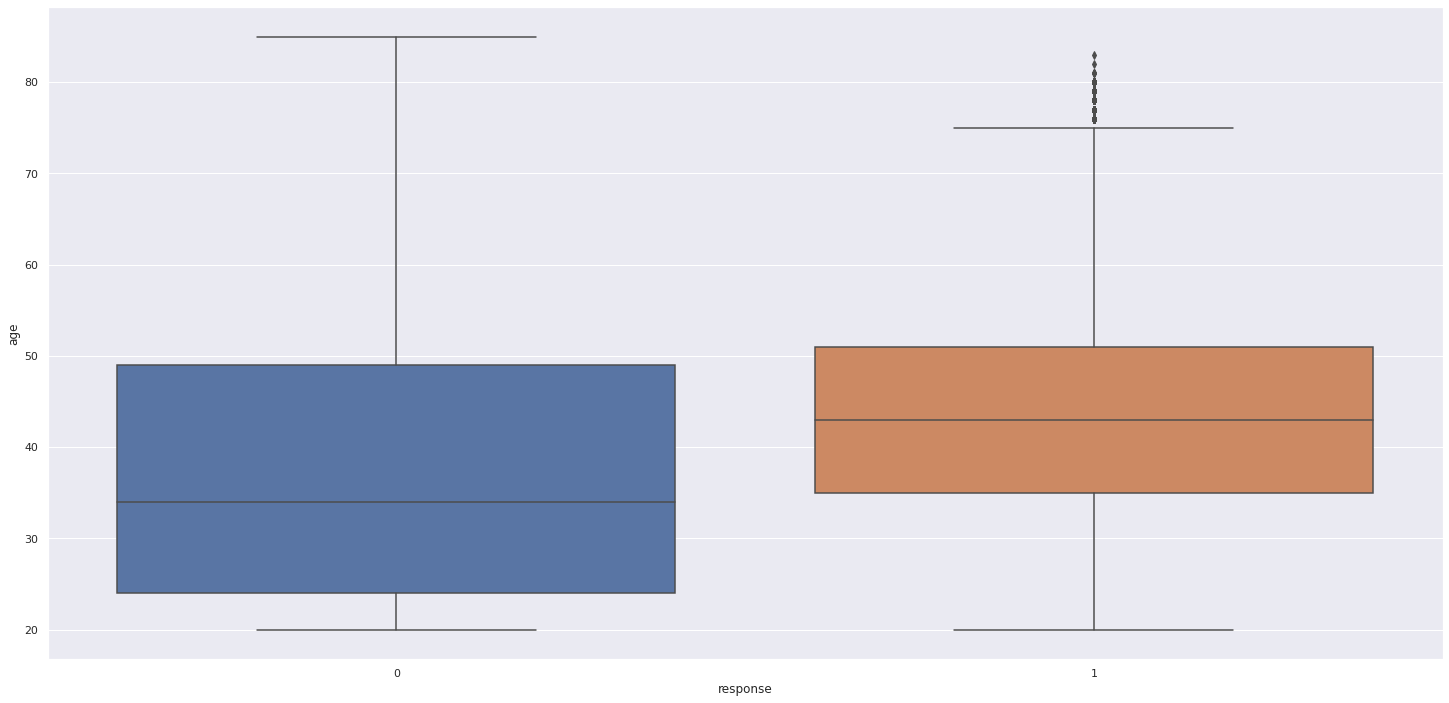

In [16]:
# Age - ajuda
sns.boxplot(x='response', y='age', data=df4);

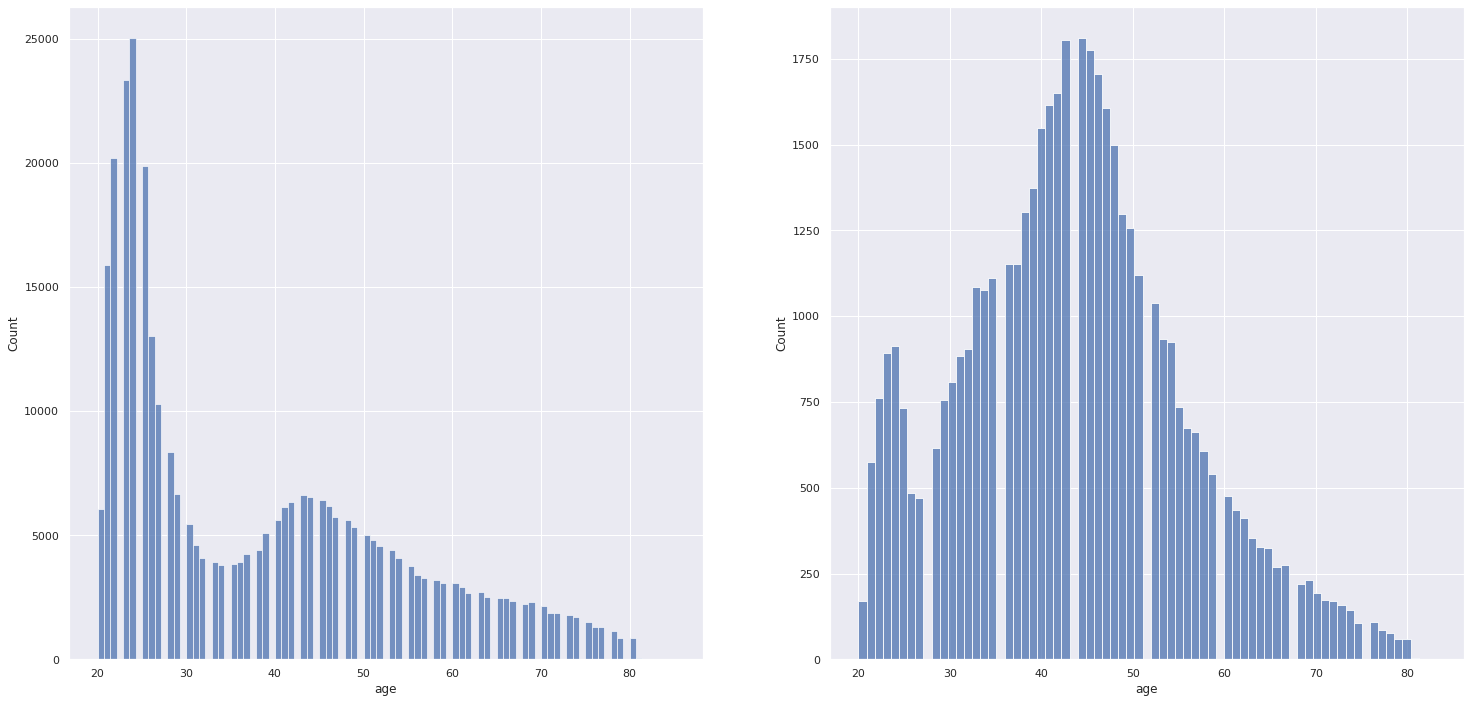

In [17]:
aux00 = df4.loc[df4['response'] == 0, 'age']
plt.subplot(1,2,1)
sns.histplot(aux00);

aux00 = df4.loc[df4['response'] == 1, 'age']
plt.subplot(1,2,2)
sns.histplot(aux00);

In [18]:
# driving_license - nao ajuda
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()

aux['driving_license_perc'] = (aux['driving_license'] / aux['driving_license'].sum()) * 100
aux

,response,driving_license,driving_license_perc
0,0,333628,87.73
1,1,46669,12.27


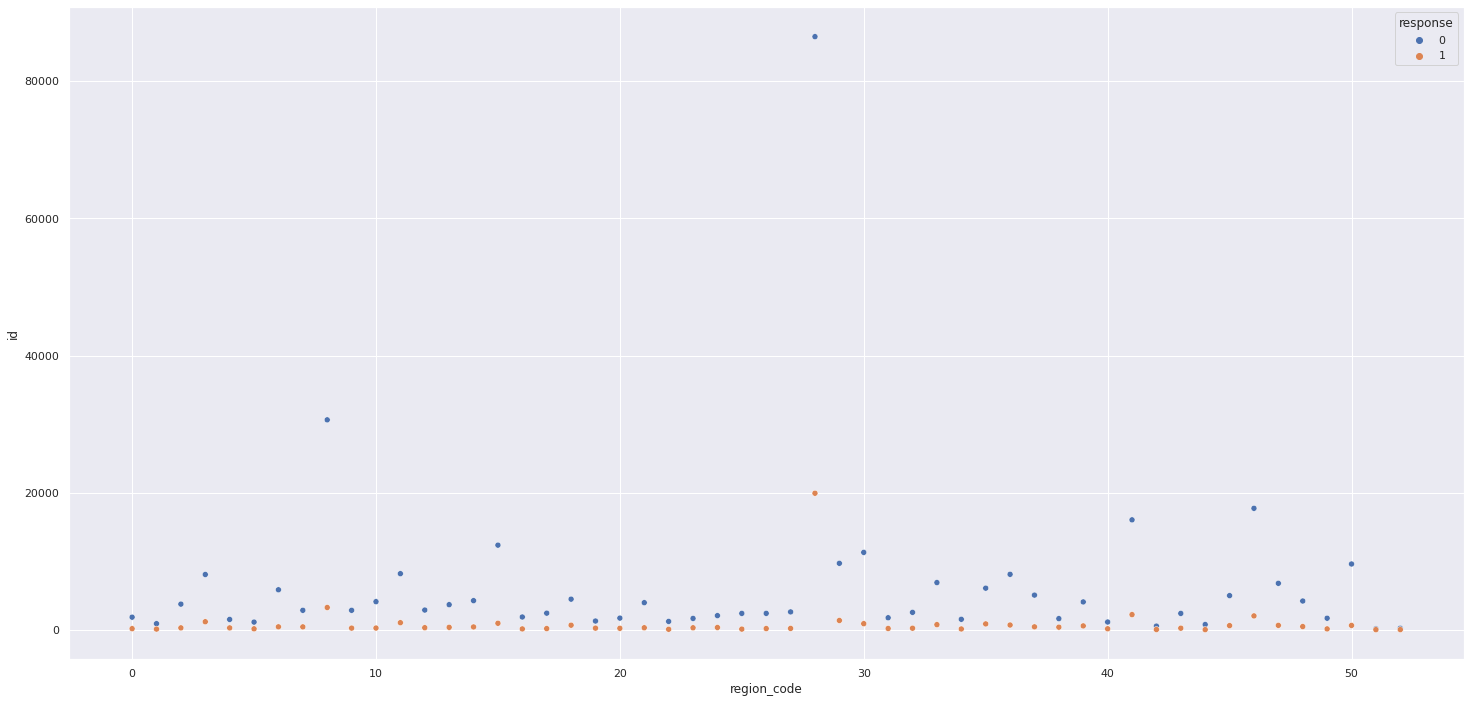

In [19]:
# region_code - não ajuda
aux = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', data=aux, hue='response');

In [20]:
# previously_insured
pd.crosstab( df4['previously_insured'], df4['response'], normalize='index' )

response,0,1
previously_insured,,
0,0.77,0.23
1,1.00,0.00


In [21]:
# vehicle_age
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index().sort_values('vehicle_age', ascending=True)

,vehicle_age,response,0
1,below_1_year,0,0.41
4,below_1_year,1,0.02
0,between_1_2_year,0,0.43
2,between_1_2_year,1,0.09
3,over_2_years,0,0.03
5,over_2_years,1,0.01


In [22]:
# vehicle_damage

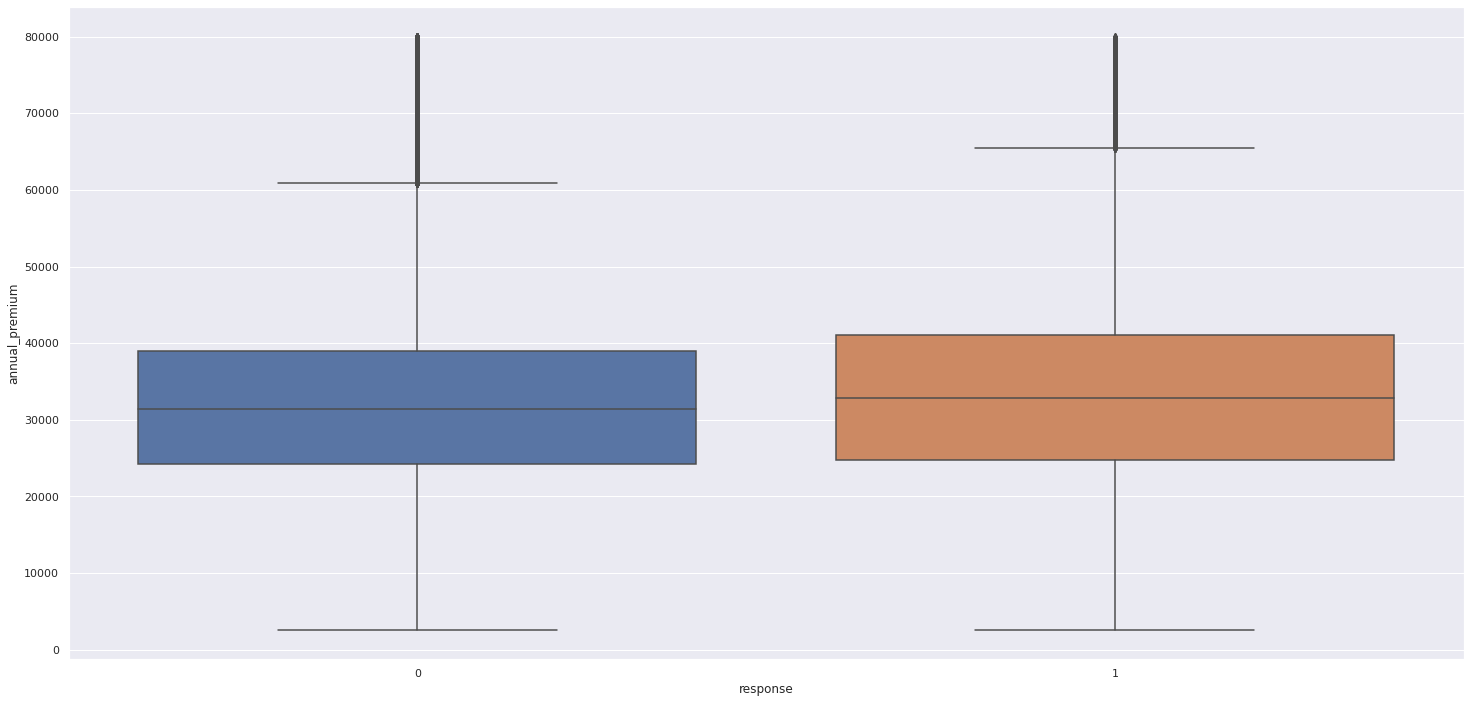

In [23]:
# annual_premium - não ajuda
aux = df4[df4['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux);

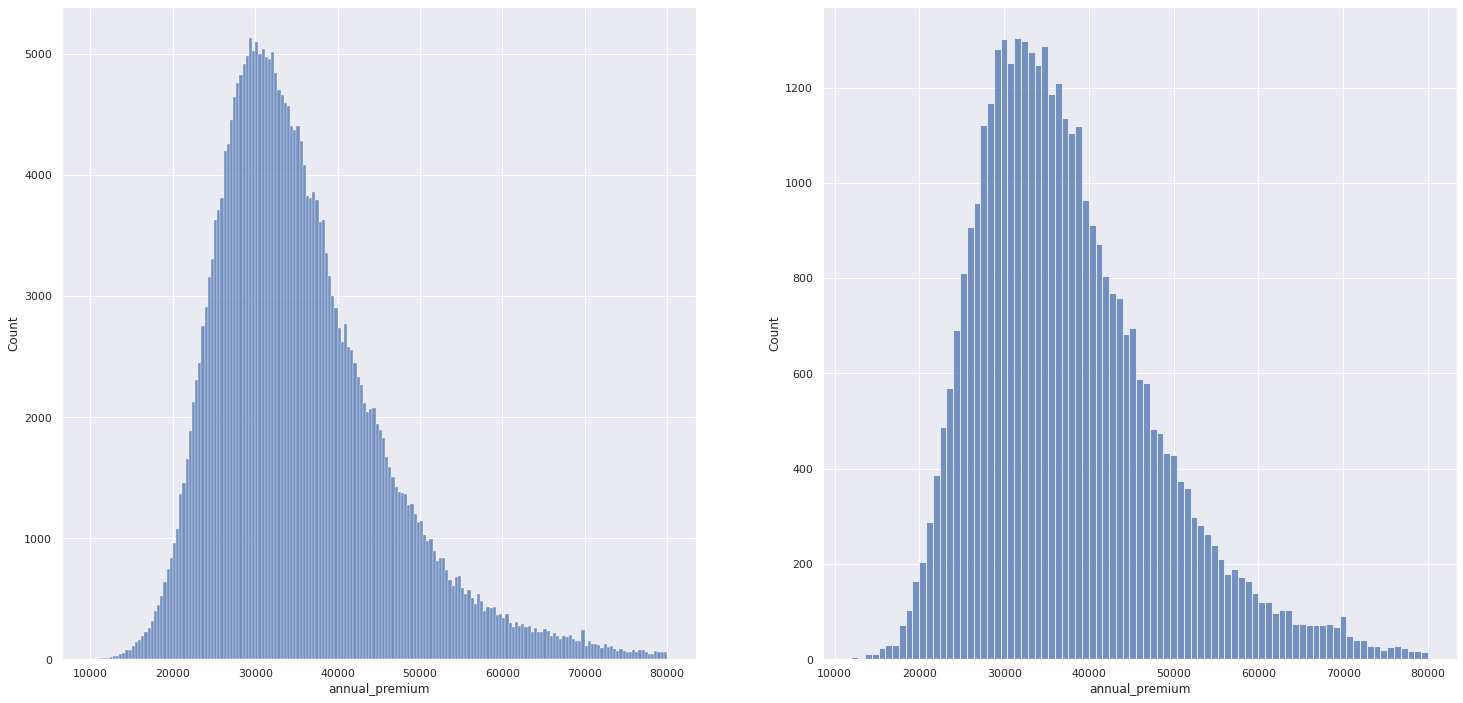

In [24]:
aux = df4[(df4['annual_premium'] < 80000) & (df4['annual_premium'] > 10000)]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
plt.subplot(1,2,1)
sns.histplot(aux00);

aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
plt.subplot(1,2,2)
sns.histplot(aux00);

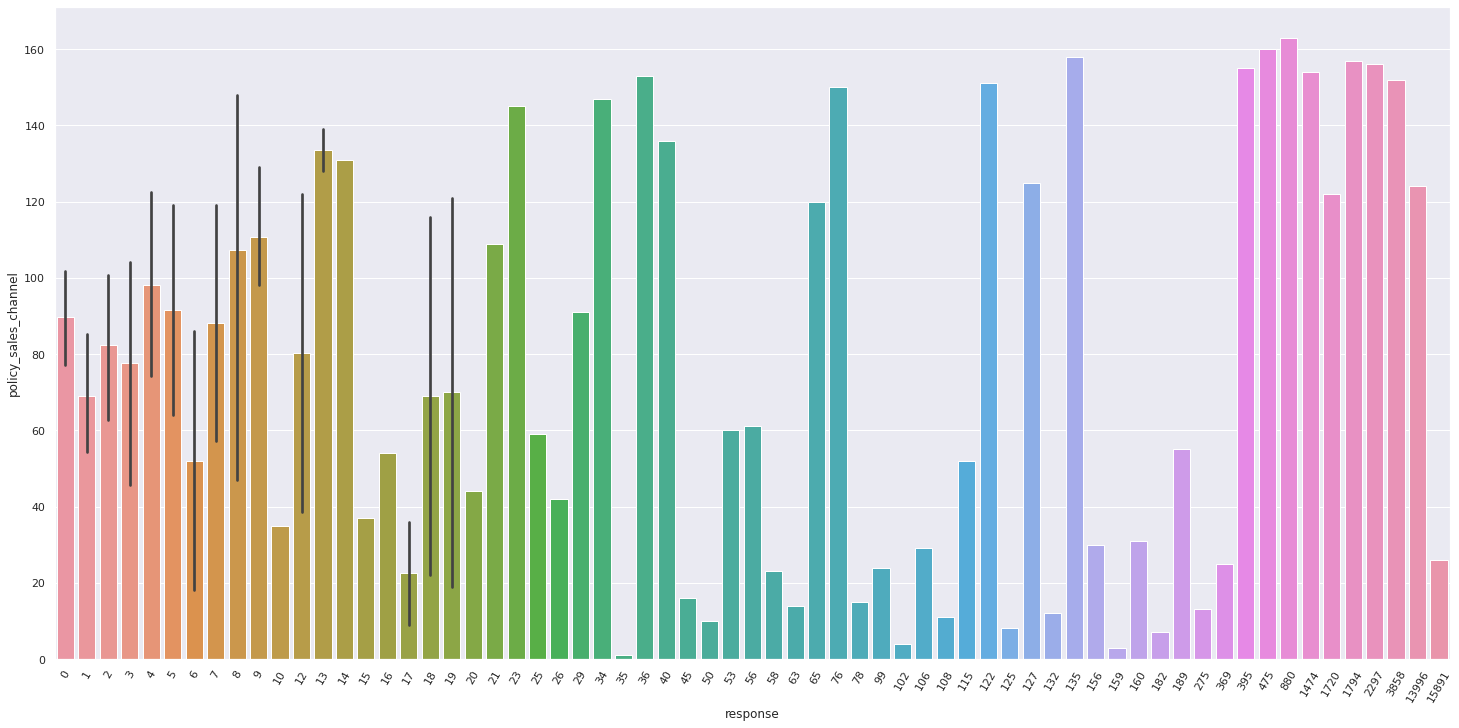

In [25]:
# policy_sales_channel
aux = df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel' ).sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);
plt.xticks(rotation=60);

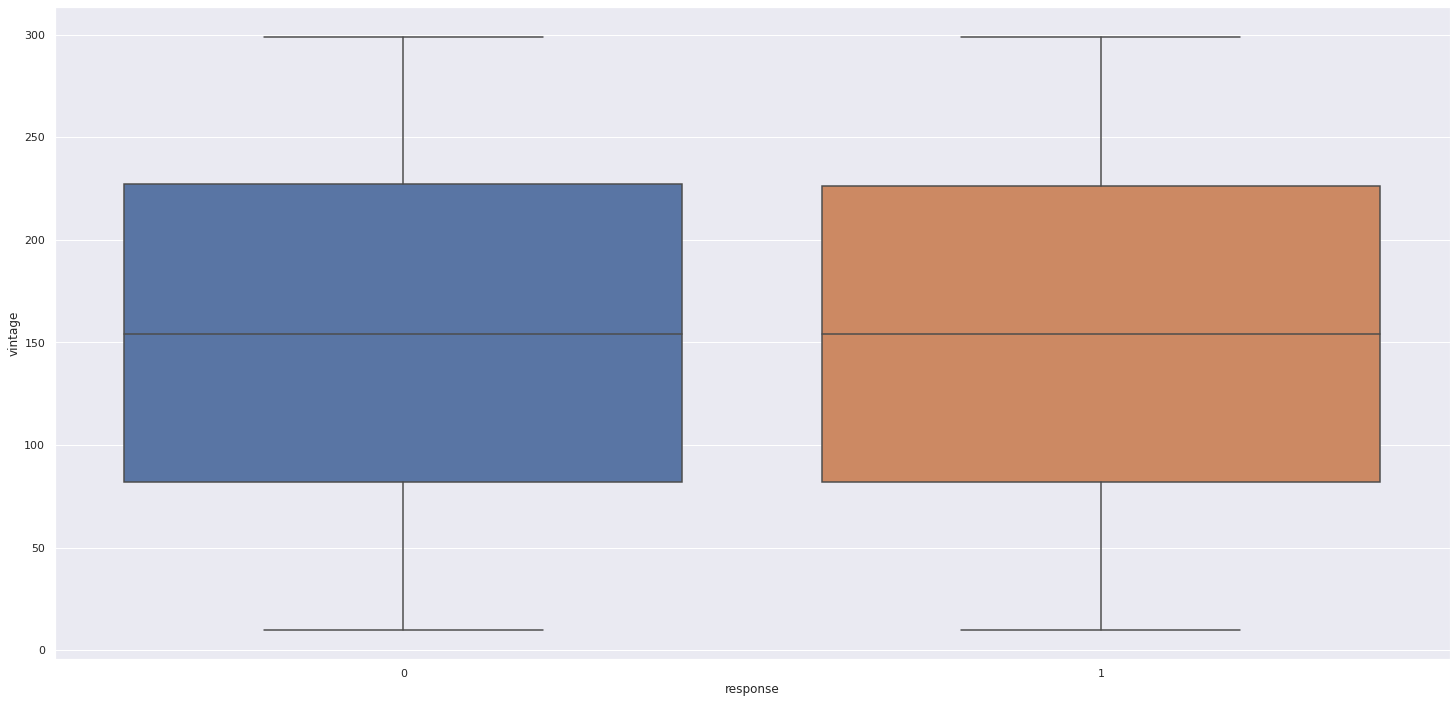

In [26]:
# Vintage - não ajuda
sns.boxplot(x='response', y='vintage', data=df4);

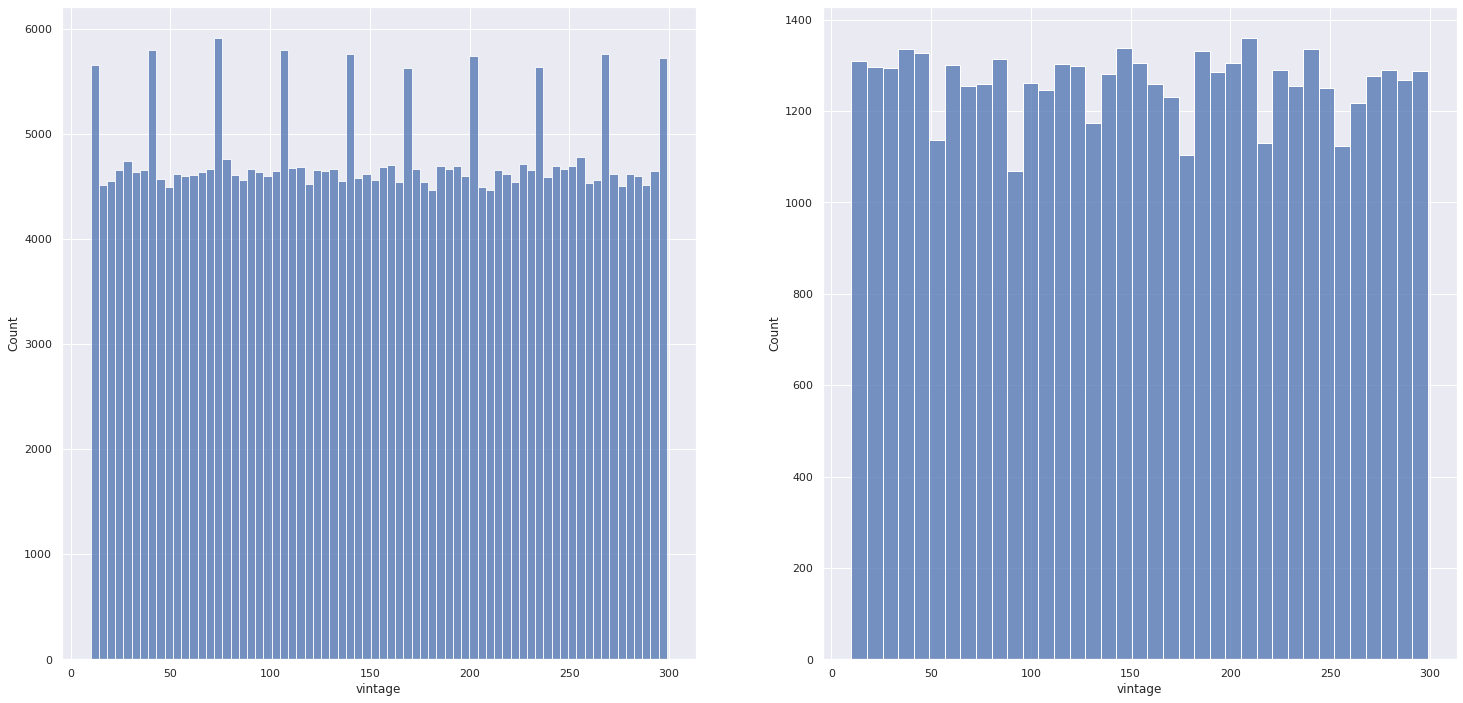

In [27]:
aux00 = df4.loc[df4['response'] == 0, 'vintage']
plt.subplot(1,2,1)
sns.histplot(aux00);

aux00 = df4.loc[df4['response'] == 1, 'vintage']
plt.subplot(1,2,2)
sns.histplot(aux00);

# DATA PREPARATION

In [28]:
df5 = df4.copy()

In [29]:
from sklearn import model_selection as ms
X = df4.drop( 'response', axis = 1 )
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1)

## Standardization
Distribuição Normal

In [30]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )


## Rescaling 
Não é uma distribuição normal

In [31]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#Age
df5['age'] = mms_age.fit_transform( df5[['age']].values )

#vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

## Encoder 
Categóricos

In [32]:
#One Hot Encoding / Frequency Encoding / Target Encoding / Weighted Target Encoding

#gender
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

#region_code - o melhor é o target(mean) encoding pq tem muitas regiões 
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel - frequency encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )




#driving_license - não precisa fazer pq já está 0 ou 1 (label encoding) 
#previously_insured - não precisa pq já está em 0 ou 1
# vehicle_damage - já está binária



## Validation Preparation

In [33]:
#gender
x_validation.loc[:, 'gender'] = x_validation['gender'].map( target_encode_gender)

#region_code - o melhor é o target(mean) encoding pq tem muitas regiões 
x_validation.loc[:, 'region_code'] = x_validation['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel - frequency encoding
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

#Age
x_validation['age'] = mms_age.fit_transform( x_validation[['age']].values )

#vintage
x_validation['vintage'] = mms_vintage.fit_transform( x_validation[['vintage']].values )

# annual_premium
x_validation['annual_premium'] = ss.fit_transform( x_validation[['annual_premium']].values )

#fillna
x_validation = x_validation.fillna( 0 )

/home/alex/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# FEATURE SELECTION

## Features Importancia

In [34]:
from sklearn import ensemble as en
#model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1)

#data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking
                        feature  importance
0                       vintage        0.27
0                annual_premium        0.24
0                           age        0.17
0                   region_code        0.11
0                vehicle_damage        0.07
0          policy_sales_channel        0.06
0            previously_insured        0.06
0      vehicle_age_below_1_year        0.01
0  vehicle_age_between_1_2_year        0.01
0                        gender        0.00
0      vehicle_age_over_2_years        0.00
0               driving_license        0.00


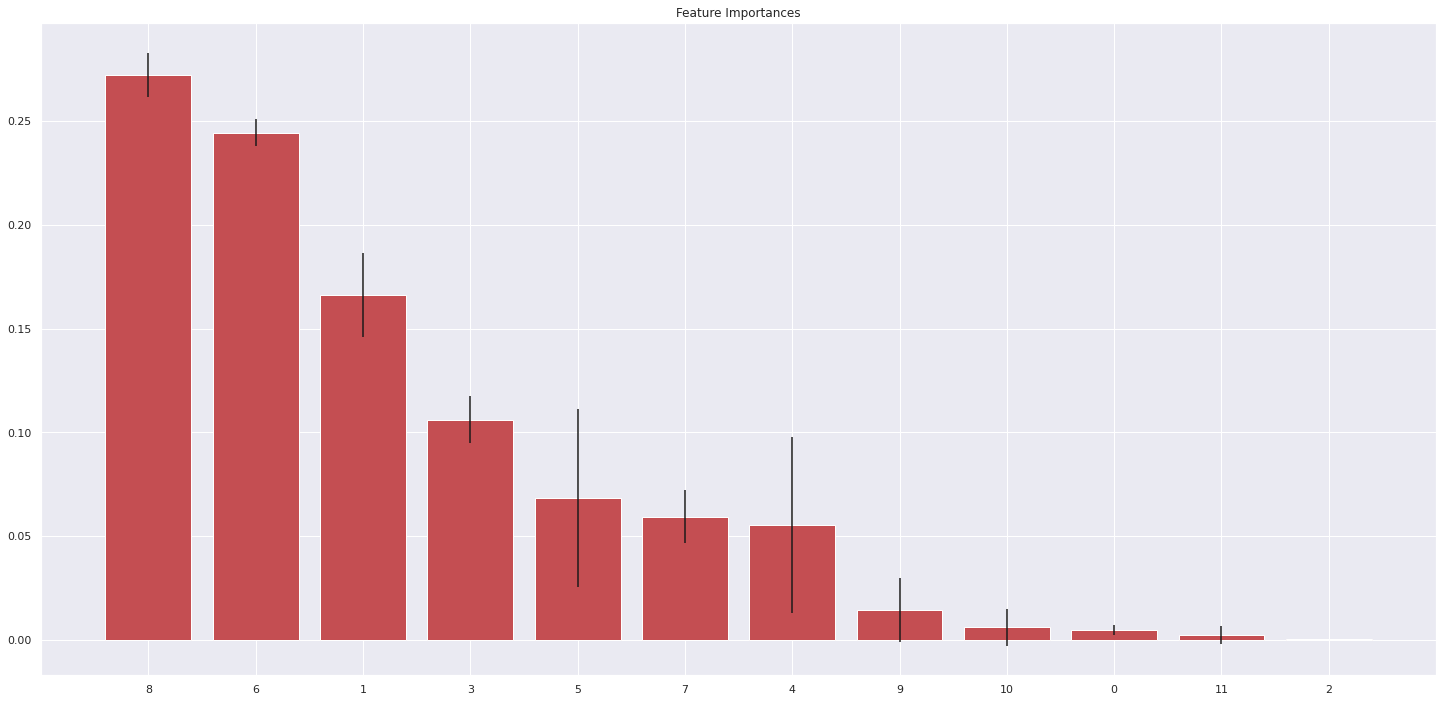

In [35]:
importances = forest.feature_importances_
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


#Print Feature Ranking
print('Feature Ranking')
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False) )

#Plot the impurity-based feature importances of the forest
plt.figure()
plt.title( 'Feature Importances' )
plt.bar( range( x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks( range(x_train_n.shape[1]), indices)
plt.xlim( [-1, x_train_n.shape[1]] )
plt.show()


# MACHINE LEARNING

In [36]:
cols_selected = ['vintage', 'annual_premium', 'age', 'region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

## KNN 

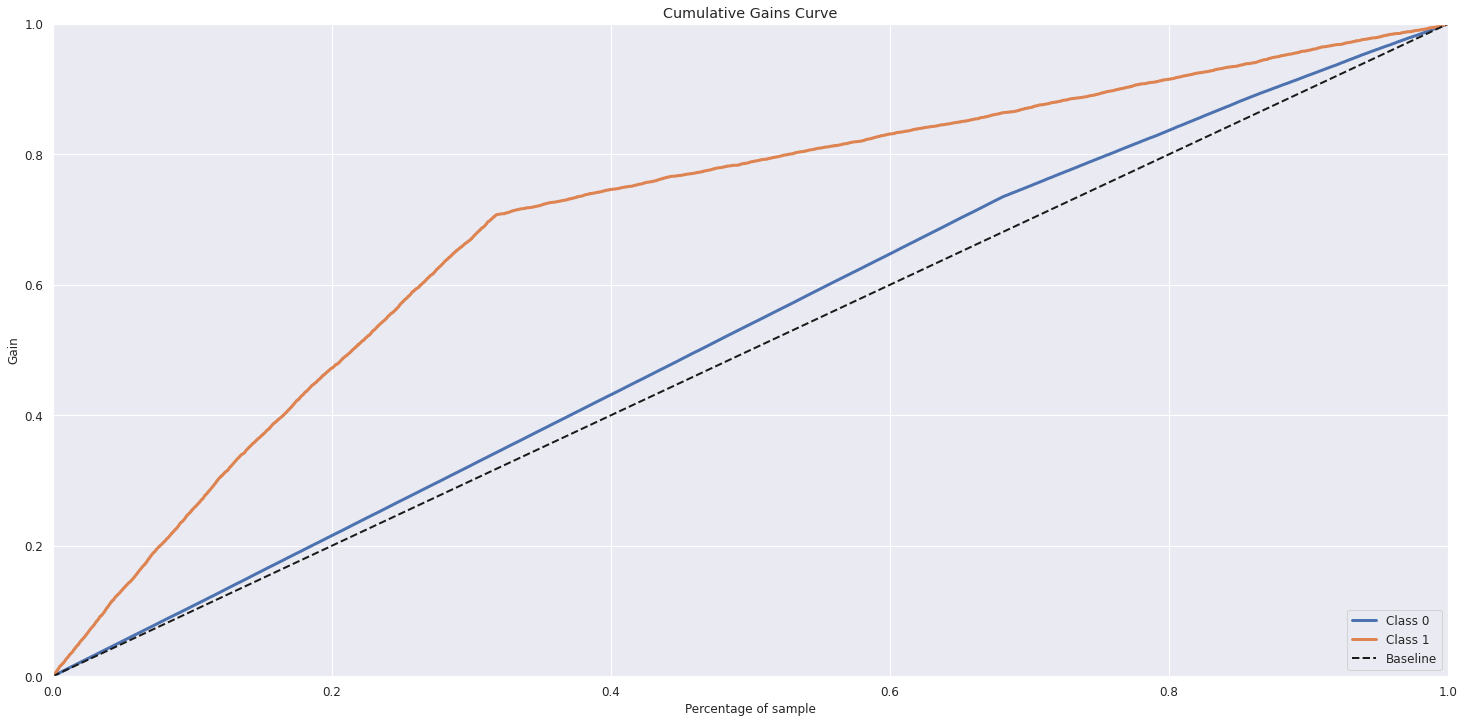

In [38]:
import scikitplot as skplt
from sklearn import neighbors as nh
#model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=4 )

#model training
knn_model.fit( x_train, y_train )

#model prediction
yhat_knn = knn_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

## Logistic Regression

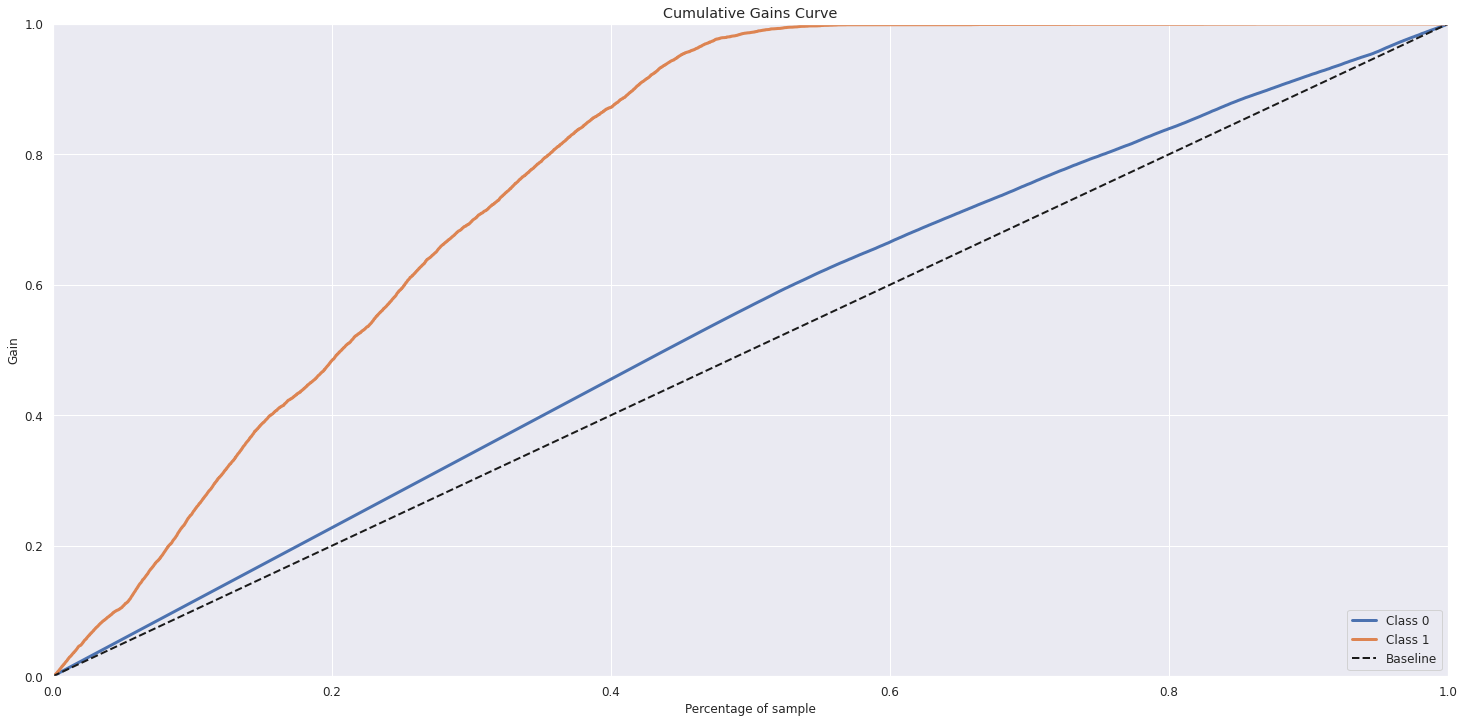

In [39]:
from sklearn import linear_model as lm

#model definition
lr_model = lm.LogisticRegression( random_state=42 )

#model training
lr_model.fit( x_train, y_train )

#model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

## Extra Tree

In [ ]:
#model definition
et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

#model fit
et.fit( x_train, y_train )

#model predict
yhat_et = et.predict_proba( x_val)

In [ ]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_et );